# 關鍵詞分析
* jieba 分詞時會連帶產生 tfidf, textrank，代表文本最重要的關鍵詞。
* 本學習包針對 textrank 運用 people 模組內的函數，進行完整的分析。
* 包括詞對分析、情感分析、文本分群、主題分析、潛在語意、文章影響指數、文字雲與社會網絡分析。


## people 模組注意事項目
* people 模組收錄文字探勘基本的工具，包括 篩選文本、斷詞、詞對與語料庫分析、主題分析、文章分群、潛在語意分析、時間趨勢繪圖。
* 資料檔基本上用 dataframe 格式，裡面有 year, token, tfidf, textrank, doc_content, title, filename 等欄位，與我們建置的 excel 檔格式一致。
* 內訂資料夾，path 設為 c:/users/user。結果檔會自動存於 c:/users/user/workint 資料夾內。
* import people 之後，會出現所有的函數列表，只要複製貼上，即可使用。
* 輸入參數，即可得出結果檔，關次參數的定義，可參考 people.ipynb 檔案，裡面有程式本身與說明。

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
# 直接繪圖，毋須 plot.show()
%matplotlib inline  
# 中文設定1: 楷體字
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

# import people

In [2]:
import people


    歡迎進入 people 模組，函數列表
    資料選取
        (df, df_year)= people.doc_select(year, kw, field, unit, path, title)
        df= people.read_doc_select(unit, field, path, title) 
        people.print_doc_select_random(df,num,field,title)
        df_ks=people.select_document_by_key_word(df, field, kw ,num, path)
        df_year= people.read_doc_select_year(path, unit, field, title)  
        people.plot_doc_select_year(df_year)
        people.print_filename(filename, field, path)
    詞頻與詞對
        df_kw= people.key_word_trend_all_year(kw, path, title,rolling=1)   
        df_kt= people.key_word_trend(df, kw, field, time, path, title,rolling=1)
        df_corpus= people.corpus_map_year(df,kw, corpus,window, path,title)
        df_corpus= people.read_corpus_map_year(kw,path)
    情感分析
        df_pn= people.sentiment_analysis(df, field, path, title,rolling=1)
        df_pn= people.read_sentiment_cluster_analysis(path,title)
    主題分析
        (df_tp, df_topic,df_lsa)= people.topic_model(df,field,nu

# 讀取 textrank 欄位

In [3]:
# 讀取儲存之檔案，比較快
path="D:/my python/people/" 
title="all"      
field ="textrank"     #  token, doc_content tfidf, treerank 四選一
unit ="arti"     # sent, arti, para, word 四選一
df= people.read_doc_select(unit, field, path, title)  
df

,year,filename,title,textrank
0,1946,人民日報_19460515_2_1941,群众认为物资微少，不足弥补八年创伤联总救济物资一部先后运到我区发放,"救济,滑县,分署,河南,面粉,豫北,衣物,发放,物资,种子,农村,灾区,生产,作风,药品,工..."
1,1946,人民日報_19460515_2_1942,生动真实深受欢迎演出“两种作风”军区文工团,"吸收,纵队,改进,集体创作,部队,报上,张际春,整训,文艺,工作团,军区,秧歌,广场,执笔,..."
2,1946,人民日報_19460515_2_1943,野战兵团在绥蒙区垦荒晋绥各部队紧张生产,"生产,群众,驻军,连队,自给,生产队,部队,驻地,开荒,兵团,组织,文水,水地,紧张,野战,..."
3,1946,人民日報_19460515_2_1945,人民日报发刊志祝,"事业,原子弹,读者,拥护者,斗争,反法西斯,虔诚,杨秀峰,预祝,胜利,边区,司机,组织者"
4,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,"四平,民主,炮火,联军,阵地,战士,老百姓,东北,政府,俘虏,和平,反动派,同志,战争,士兵..."
...,...,...,...,...
1586633,2012,人民日報_20120101_2_20645,全国人大常委会办公厅举行新闻发布会,"职业病,澳门,诊断,防治法,鉴定,修改,政治体制,救治,安监,总局,全国人大常委会,病人,全..."
1586634,2012,人民日報_20120101_3_20646,人大常委会第二十四次会议在京闭幕,"会议,发展,全国人大常委会,全国人大,审议,草案,表决,经济,吴邦国,职业病,教育,保障,农..."
1586635,2012,人民日報_20120101_3_20647,迎希望 鼓信心,"国家,南非,成功,经济,转型,致辞,政府,社会,欧元,总理,马来西亚,总统,政治,骄傲,快乐..."
1586636,2012,人民日報_20120101_3_20648,朝鲜发布迎接金日成诞辰100周年联合口号,"全党,全军,全民,金正恩,国家,朝鲜劳动党,政治,诞辰,口号,号召,领导,金正日,军队,朝鲜..."


In [4]:
# 為節省時間，先選一千筆測試 ###
df=df.sample(3000)
df.index=range(len(df))

In [5]:
df

,year,filename,title,textrank
0,2011,人民日報_20110227_1_35790,福建谋变之年提速提气,"发展,福建,产业,平潭,项目,福州,企业,龙岩,厦门,全省,建设,民生,经济,台湾,创新,战..."
1,1958,人民日報_19580325_4_190670,给下放干部及时供应精神食粮,"报纸,邮局,辉县,郑州,农业社,订阅,人民日报,放到,群众,河村,信件,投递,报刊,同志,新..."
2,1963,人民日報_19630501_4_306589,老挝爱国战线党副主席费当发表谈话,"老挝,民族团结,政府,爱国,集团,费当,保卫,美帝国主义,阴谋,破坏,川圹,号召,平原,查尔..."
3,1969,人民日報_19690615_6_386909,走着沙皇俄国的扩张老路,"沙皇,帝国主义,侵略,俄国,中国,沙俄,国家,社会,地中海,扩张,反革命,妄图,蒙古,世界霸..."
4,1962,人民日報_19620703_6_292909,陵园,"孩子,陵墓,红色,先烈,垂柳,像是,歌声,笑声,枝条,广州起义,欢乐,松树,当成,友谊,热闹..."
...,...,...,...,...
2995,2008,人民日報_20081230_4_129,黎原同志逝世,"历任,时期,逝世,勋章,战役,军长,军衔,保卫,杜青林,战斗,独立,现代化,中国共产党,同志..."
2996,1960,人民日報_19600805_6_250679,阿尔巴尼亚铬矿生产飞跃发展目前十二天产量相当于解放前全年产量,"矿石,产量,铬矿,铜矿,生产,计划,化学,建设,飞跃发展,相当于,铁路,修建,联合,冶金,老..."
2997,2004,人民日報_20040706_12_19686,绿茵竞逐的新坐标（体坛焦点）,"希腊队,葡萄牙队,欧锦赛,足坛,欧洲,球队,荷兰队,捷克队,强队,小组赛,足球,技术,战术,..."
2998,1983,人民日報_19830106_2_614703,允许农民合法贩运实行多种渠道经销安徽省委肯定汪全精是劳动致富,"经营,汪全精,社员,大队,农村,组织,发展,树兜,农民,经济,支持,列为,县委,茶籽,联合,..."


# 情感分析

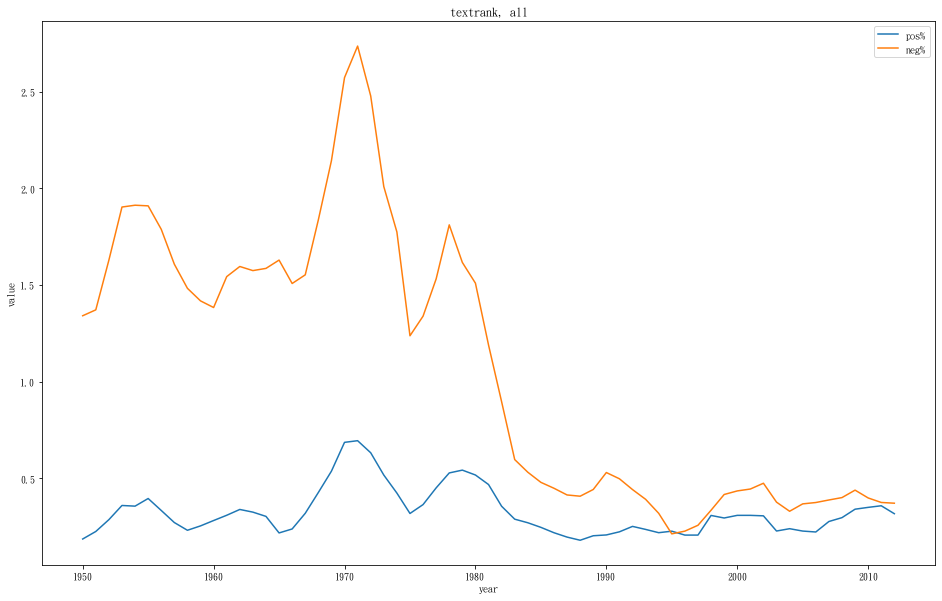

In [6]:
field='textrank'
title='textrank, all'
rolling=5
df_pn= people.sentiment_analysis(df, field, path, title,rolling)

In [7]:
df_pn

,year,褒獎詞,貶抑詞,反革命,count,pos,neg,anti,pos%,neg%
0,1946,"[(合法, 1), (优良传统, 1)]","[(阴谋, 1), (卑鄙, 1), (借口, 1), (谣言, 1), (破坏, 1), ...","[(反动派, 2), (独裁, 1), (卖国, 1), (法西斯, 2), (国民党, 5...",9,2,11,12,0.222222,1.222222
1,1947,"[(贡献, 1), (英雄, 1), (勇敢, 1), (天才, 1)]","[(妄图, 1), (威胁, 1), (破产, 2), (孤立, 3), (麻痹, 1), ...","[(封建, 2), (汉奸, 1), (贪污, 1), (贿选, 1), (独裁, 1), ...",29,4,40,29,0.137931,1.379310
2,1948,"[(创造性, 1), (勇敢, 1)]","[(威胁, 1), (分化, 1), (镇压, 1), (挑拨, 1), (掠夺, 1), ...","[(美帝国主义, 1), (反动, 1), (伪军, 2), (特务, 3), (地主, 2...",15,2,14,17,0.133333,0.933333
3,1949,"[(光荣任务, 1), (充分发挥, 1), (英雄, 1), (贡献, 1), (勇敢, 1)]","[(庇护, 1), (侵略, 3), (罪行, 3), (掠夺, 1), (走狗, 2), ...","[(反动, 5), (帝国主义, 5), (国民党, 10), (资本主义, 4), (侵略...",39,5,61,52,0.128205,1.564103
4,1950,"[(英雄, 3), (贡献, 3), (宝贵, 1), (创造性, 2), (卓越, 1),...","[(侵略, 6), (威胁, 2), (侮辱, 1), (欺凌, 1), (嘲笑, 1), ...","[(侵略者, 2), (美帝国主义, 4), (帝国主义, 8), (法西斯, 2), (国...",43,13,69,36,0.302326,1.604651
...,...,...,...,...,...,...,...,...,...,...
62,2008,"[(宝贵, 4), (贡献, 6), (勇敢, 1), (充分发挥, 3), (光辉, 1)...","[(落后, 3), (侵犯, 1), (恶化, 2), (党纪政纪, 1), (破坏, 1)...","[(伪造, 1), (平均主义, 1)]",60,18,14,2,0.300000,0.233333
63,2009,"[(英雄, 2), (激动人心, 1), (充分发挥, 4), (贡献, 10), (高素质...","[(脱节, 1), (叫嚣, 1), (猖狂, 1), (暴徒, 1), (破坏, 3), ...","[(保护主义, 2), (乱收费, 1), (伪军, 1), (国民党, 1), (特务, ...",73,31,42,9,0.424658,0.575342
64,2010,"[(贡献, 5), (光辉, 1), (宝贵, 2), (高尚, 1), (精辟, 1), ...","[(扰乱, 1), (虚假, 1), (滥用, 1), (小圈子, 1), (出卖, 1),...","[(官僚主义, 1), (流氓, 1), (受贿, 1), (企业债券, 1), (奸商, ...",74,22,21,8,0.297297,0.283784
65,2011,"[(不朽, 1), (宝贵, 2), (历史使命, 2), (光辉业绩, 1), (贡献, ...","[(售假, 1), (假冒, 1), (犯罪, 1), (贵族, 1), (色情, 1), ...","[(制假, 1), (知识分子, 1), (形式主义, 1), (反革命, 1), (现实主...",78,18,32,7,0.230769,0.410256


# 主題分析

In [8]:
# 篩選資料 要花時間
field='textrank'
num_i=10
method='nmf'
(df1, df_topic,df_lsa)= people.topic_model(df,field,num_i, method,path, title)

tfidf......
extract topics ......


C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


維度數 10
字詞數 52919
0 ['企业', '建设', '发展', '经济', '社会', '改革', '管理', '实施', '提高', '部门', '制度', '服务', '完善', '机制', '市场', '目标', '国务院', '政策', '调整', '环境', '国家', '增强', '保障', '增长', '稳定', '政府', '能力', '措施', '加大', '全国', '体系', '发挥', '创新', '力度', '解决', '项目', '投资', '中央', '经济社会', '战略', '协调', '法律', '资金', '科学', '资源', '行业', '结构', '综合', '产业', '保护']
1 ['合作', '两国', '会见', '关系', '中国', '友好合作', '发展', '交流', '领域', '总理', '经济', '访问', '两国人民', '友好', '友谊', '建交', '友好关系', '领导人', '贸易', '双边关系', '中国政府', '增进', '交往', '外长', '赞赏', '经贸', '交换', '国际', '互利', '问候', '访华', '总统', '转达', '签署', '感谢', '政治', '今天下午', '来访', '稳定', '人民大会堂', '会谈', '出席', '文化', '和平', '祝愿', '介绍', '议长', '高层', '大使', '投资']
2 ['斗争', '侵略', '美帝国主义', '全世界', '帝国主义', '独立', '民族', '阴谋', '和平', '支持', '侵略者', '胜利', '越南', '战争', '谴责', '美国', '朝鲜', '世界', '团结', '民主', '殖民主义', '兄弟', '走狗', '自由', '统一', '保卫', '失败', '解放', '统治', '中国', '正义斗争', '集团', '祖国', '祝贺', '革命', '英勇', '国家', '道路', '权利', '打败', '干涉', '爱好和平', '号召', '爱国', '反帝', '罪恶', '致电', '破坏', '越南民主共和国', '军事']
3 ['思想', '同志', '革命', '毛主席', '政治', '学习

In [9]:
df_topic

,0,1,2,3,4,5,6,7,8,9
0,合作,代表团,美帝国主义,革命,企业,文化,社会,美国,比赛,生产
1,两国,团长,侵略,毛主席,市场,艺术,制度,宣布,选手,农业
2,关系,率领,斗争,学习,产品,生活,建设,总统,冠军,农民
3,友好合作,访问,战争,思想,公司,学生,完善,会议,女子,粮食
4,会见,友好,帝国主义,毛泽东思想,投资,历史,改革,政府,男子,农村
...,...,...,...,...,...,...,...,...,...,...
495,姬鹏飞,郭达凯,决不会,支左,恢复,唱歌,全民,核查,障碍,承包
496,深切,杨化南,迈进,英明领导,水产品,贴近,广大群众,驻军,挑战赛,简单
497,福祉,几内亚共和国,特务,革命行动,科学技术,英国,农民,事实,保持者,打破
498,口信,麦耶,和平力量,罪恶,具备,同胞,时代,民主,张国林,办公


In [10]:
df1

,year,filename,title,textrank,褒獎詞,貶抑詞,反革命,pos,neg,anti,cate
0,1990,人民日報_19900607_2_871306,澳门基本法起草委员会举行第四次全体会议本报北京６月７日讯,起草 澳门基本法 委会 小组 专题 基本法 澳门 草委 会议 全体会议 内地 主任委员 北京...,[],[],[],0,0,0,6
1,1973,人民日報_19730415_1_434123,肥城矿务局坚决执行党的社会主义建设总路线,采煤 工作面 产量 提高 建设 作业 生产 煤炭 循环 工人 维修 革命干劲 机械 思想 矿...,[充分发挥],[],[],1,0,0,9
2,1993,人民日報_19930606_6_939188,美朝关于核问题会谈休会双方将协商在１２日之前复会,会谈 朝鲜 美国 姜锡柱 条约 休会 核武器 协商 代表团 扩散 加卢齐 外长 让步 朝鲜政...,[],[],[],0,0,0,7
3,1956,人民日報_19560505_2_140308,加强果树管理全国著名苹果产地——辽宁省金县友好农业生产合作社的八百棵苹果树已经完成了喷射杀虫...,苹果 硫黄 喷射 乳剂 产地 著名 管理 全国 果树 辽宁省 杀虫 柴油 苹果树 预计 友好 增产,[],[],[],0,0,0,9
4,1988,人民日報_19881015_3_809940,抗生素抗果树腐烂病,果树 抗生素 防治 腐烂 轮纹病 病害 投入 特效 干腐病 很好 炭疽病 苹果 用于 批量生...,[],[],[],0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...
2995,1990,人民日報_19900427_2_867249,中朝签订一九九○年换货协议,中国 吕学俭 货物 朝鲜 李钟玉 会见 平壤 今天下午 议定书 核心 互换 万寿台 改革 开...,[],[],[],0,0,0,1
2996,1987,人民日報_19870523_1_762707,我光电测距仪检测中心建成检测结果达到相应的国际水平,检测 测距仪 鉴定 数据 仪器 北京 精确 先进 委托 国家科委 性能 国际 具备 质量 评...,[],[],[],0,0,0,4
2997,1986,人民日報_19860802_5_734323,教育改革要借鉴经济改革的经验,教育 改革 经济 发展 形式 学科 培养 经济体制 委托 并存 提高 生产 学校 教学 结构...,[专门人才],"[分化, 浪费]",[],1,2,0,6
2998,2004,人民日報_20040627_1_20594,东三省人才市场一体化启动,人才 市场 三省 东北地区 人事代理 统一 合作 信息 东北三省 标志 框架 长春 辽宁 吉...,[],[],[],0,0,0,6


In [11]:
#######################################
# 直接讀取檔案，節省時間 
(df1, df_topic,df_lsa)= people.read_topic_model(path, title) 

## 定義 labels

In [12]:
# 定義 labels 取前兩個詞
a=list(df_topic.iloc[0])[len(df_topic.columns)-num_i:]   # 去除有時自行增加的欄位
b=list(df_topic.iloc[1])[len(df_topic.columns)-num_i:]
labels=[]
for n in range(len(a)):
    labels.append(a[n]+b[n])
labels

['合作两国',
 '代表团团长',
 '美帝国主义侵略',
 '革命毛主席',
 '企业市场',
 '文化艺术',
 '社会制度',
 '美国宣布',
 '比赛选手',
 '生产农业']

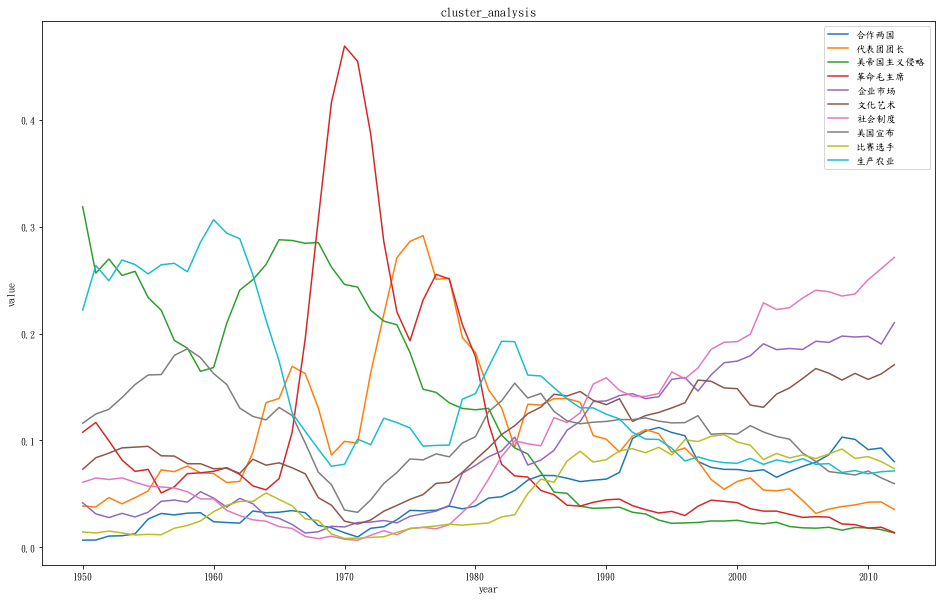

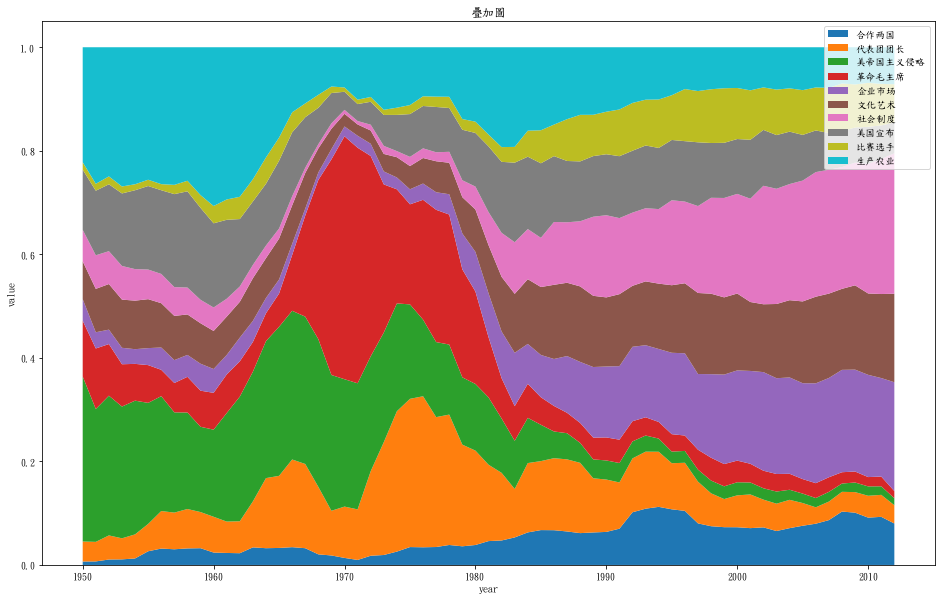

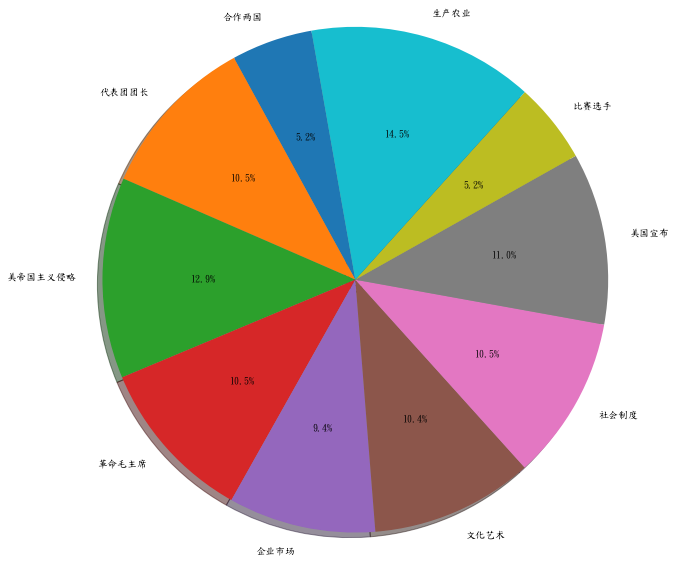

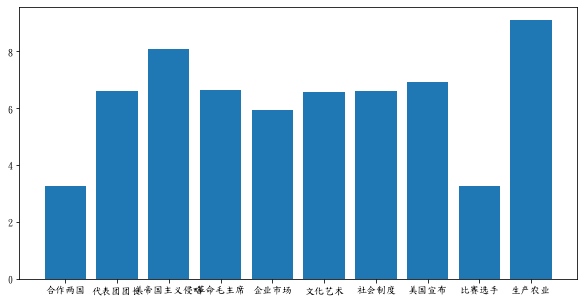

In [13]:
rolling=5
ts= people.plot_topic_model(df_lsa,labels,rolling)

# 文章分群

In [6]:
df

,year,filename,title,textrank
0,2011,人民日報_20110227_1_35790,福建谋变之年提速提气,"发展,福建,产业,平潭,项目,福州,企业,龙岩,厦门,全省,建设,民生,经济,台湾,创新,战..."
1,1958,人民日報_19580325_4_190670,给下放干部及时供应精神食粮,"报纸,邮局,辉县,郑州,农业社,订阅,人民日报,放到,群众,河村,信件,投递,报刊,同志,新..."
2,1963,人民日報_19630501_4_306589,老挝爱国战线党副主席费当发表谈话,"老挝,民族团结,政府,爱国,集团,费当,保卫,美帝国主义,阴谋,破坏,川圹,号召,平原,查尔..."
3,1969,人民日報_19690615_6_386909,走着沙皇俄国的扩张老路,"沙皇,帝国主义,侵略,俄国,中国,沙俄,国家,社会,地中海,扩张,反革命,妄图,蒙古,世界霸..."
4,1962,人民日報_19620703_6_292909,陵园,"孩子,陵墓,红色,先烈,垂柳,像是,歌声,笑声,枝条,广州起义,欢乐,松树,当成,友谊,热闹..."
...,...,...,...,...
2995,2008,人民日報_20081230_4_129,黎原同志逝世,"历任,时期,逝世,勋章,战役,军长,军衔,保卫,杜青林,战斗,独立,现代化,中国共产党,同志..."
2996,1960,人民日報_19600805_6_250679,阿尔巴尼亚铬矿生产飞跃发展目前十二天产量相当于解放前全年产量,"矿石,产量,铬矿,铜矿,生产,计划,化学,建设,飞跃发展,相当于,铁路,修建,联合,冶金,老..."
2997,2004,人民日報_20040706_12_19686,绿茵竞逐的新坐标（体坛焦点）,"希腊队,葡萄牙队,欧锦赛,足坛,欧洲,球队,荷兰队,捷克队,强队,小组赛,足球,技术,战术,..."
2998,1983,人民日報_19830106_2_614703,允许农民合法贩运实行多种渠道经销安徽省委肯定汪全精是劳动致富,"经营,汪全精,社员,大队,农村,组织,发展,树兜,农民,经济,支持,列为,县委,茶籽,联合,..."


In [10]:
# 文本分群 要花時間
field='textrank'
num_i=100
n_clus=10
(df2, clus_token, df_rate, df_count, df_clus_most)= people.cluster_analysis(df, field,path,title, method='svd', num_i=100, n_clus=10)

tfidf......
降維 ......
total explained ratio  0.1041703787939974
kmeans 分群......
計算各類文章的總數與比例......
各群最常出現的 30 關鍵字詞......
save.....
save D:/my python/people/working/all_df.xlsx
save D:/my python/people/working/all_clus_token.pkl
save D:/my python/people/working/all_df_rate.xlsx
save D:/my python/people/working/all_df_count.xlsx
save D:/my python/people/working/all_df_clus_most.xlsx


In [11]:
df2

,year,filename,title,textrank,cluster
0,2011,人民日報_20110227_1_35790,福建谋变之年提速提气,发展 福建 产业 平潭 项目 福州 企业 龙岩 厦门 全省 建设 民生 经济 台湾 创新 战...,2
1,1958,人民日報_19580325_4_190670,给下放干部及时供应精神食粮,报纸 邮局 辉县 郑州 农业社 订阅 人民日报 放到 群众 河村 信件 投递 报刊 同志 新...,1
2,1963,人民日報_19630501_4_306589,老挝爱国战线党副主席费当发表谈话,老挝 民族团结 政府 爱国 集团 费当 保卫 美帝国主义 阴谋 破坏 川圹 号召 平原 查尔...,8
3,1969,人民日報_19690615_6_386909,走着沙皇俄国的扩张老路,沙皇 帝国主义 侵略 俄国 中国 沙俄 国家 社会 地中海 扩张 反革命 妄图 蒙古 世界霸...,8
4,1962,人民日報_19620703_6_292909,陵园,孩子 陵墓 红色 先烈 垂柳 像是 歌声 笑声 枝条 广州起义 欢乐 松树 当成 友谊 热闹...,9
...,...,...,...,...,...
2995,2008,人民日報_20081230_4_129,黎原同志逝世,历任 时期 逝世 勋章 战役 军长 军衔 保卫 杜青林 战斗 独立 现代化 中国共产党 同志...,1
2996,1960,人民日報_19600805_6_250679,阿尔巴尼亚铬矿生产飞跃发展目前十二天产量相当于解放前全年产量,矿石 产量 铬矿 铜矿 生产 计划 化学 建设 飞跃发展 相当于 铁路 修建 联合 冶金 老...,6
2997,2004,人民日報_20040706_12_19686,绿茵竞逐的新坐标（体坛焦点）,希腊队 葡萄牙队 欧锦赛 足坛 欧洲 球队 荷兰队 捷克队 强队 小组赛 足球 技术 战术 ...,4
2998,1983,人民日報_19830106_2_614703,允许农民合法贩运实行多种渠道经销安徽省委肯定汪全精是劳动致富,经营 汪全精 社员 大队 农村 组织 发展 树兜 农民 经济 支持 列为 县委 茶籽 联合 ...,7


In [12]:
#######################################
# 直接讀取檔案，節省時間 
(df2, clus_token, df_rate, df_count, df_clus_most)= people.read_cluster_analysis(path,title)

In [13]:
df_clus_most

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,中国,组织,发展,领导,比赛,美国,生产,生产,斗争,中国
1,1,访问,同志,经济,群众,中国,国家,国家,农民,美国,艺术
2,2,代表团,生活,国家,思想,选手,政府,技术,发展,国家,作品
3,3,发展,全国,企业,干部,冠军,会议,产品,农业,侵略,文化
4,4,会见,国家,建设,发展,女子,国际,公司,社员,中国,创作
5,5,北京,北京,社会,学习,北京,总统,企业,组织,支持,生活
6,6,合作,发展,管理,教育,决赛,宣布,发展,群众,美帝国主义,历史
7,7,友好,领导,政府,组织,世界,经济,设备,地区,敌人,发展
8,8,经济,群众,提高,提高,运动员,发展,提高,提高,革命,北京
9,9,关系,学生,全国,同志,男子,世界,工业,技术,战争,传统


In [14]:
df2

,Unnamed: 0,year,filename,title,textrank,cluster
0,0,2011,人民日報_20110227_1_35790,福建谋变之年提速提气,发展 福建 产业 平潭 项目 福州 企业 龙岩 厦门 全省 建设 民生 经济 台湾 创新 战...,2
1,1,1958,人民日報_19580325_4_190670,给下放干部及时供应精神食粮,报纸 邮局 辉县 郑州 农业社 订阅 人民日报 放到 群众 河村 信件 投递 报刊 同志 新...,1
2,2,1963,人民日報_19630501_4_306589,老挝爱国战线党副主席费当发表谈话,老挝 民族团结 政府 爱国 集团 费当 保卫 美帝国主义 阴谋 破坏 川圹 号召 平原 查尔...,8
3,3,1969,人民日報_19690615_6_386909,走着沙皇俄国的扩张老路,沙皇 帝国主义 侵略 俄国 中国 沙俄 国家 社会 地中海 扩张 反革命 妄图 蒙古 世界霸...,8
4,4,1962,人民日報_19620703_6_292909,陵园,孩子 陵墓 红色 先烈 垂柳 像是 歌声 笑声 枝条 广州起义 欢乐 松树 当成 友谊 热闹...,9
...,...,...,...,...,...,...
2995,2995,2008,人民日報_20081230_4_129,黎原同志逝世,历任 时期 逝世 勋章 战役 军长 军衔 保卫 杜青林 战斗 独立 现代化 中国共产党 同志...,1
2996,2996,1960,人民日報_19600805_6_250679,阿尔巴尼亚铬矿生产飞跃发展目前十二天产量相当于解放前全年产量,矿石 产量 铬矿 铜矿 生产 计划 化学 建设 飞跃发展 相当于 铁路 修建 联合 冶金 老...,6
2997,2997,2004,人民日報_20040706_12_19686,绿茵竞逐的新坐标（体坛焦点）,希腊队 葡萄牙队 欧锦赛 足坛 欧洲 球队 荷兰队 捷克队 强队 小组赛 足球 技术 战术 ...,4
2998,2998,1983,人民日報_19830106_2_614703,允许农民合法贩运实行多种渠道经销安徽省委肯定汪全精是劳动致富,经营 汪全精 社员 大队 农村 组织 发展 树兜 农民 经济 支持 列为 县委 茶籽 联合 ...,7


## 定義 labels

In [15]:
# 定義 labels 取前兩個詞
n_clus=10
a=list(df_clus_most.iloc[0])[len(df_clus_most.columns)-n_clus:]
b=list(df_clus_most.iloc[1])[len(df_clus_most.columns)-n_clus:]
labels=[]
for n in range(len(a)):
    labels.append(a[n]+b[n])
labels

['中国访问',
 '组织同志',
 '发展经济',
 '领导群众',
 '比赛中国',
 '美国国家',
 '生产国家',
 '生产农民',
 '斗争美国',
 '中国艺术']

## 繪圖

In [16]:
df2

,Unnamed: 0,year,filename,title,textrank,cluster
0,0,2011,人民日報_20110227_1_35790,福建谋变之年提速提气,发展 福建 产业 平潭 项目 福州 企业 龙岩 厦门 全省 建设 民生 经济 台湾 创新 战...,2
1,1,1958,人民日報_19580325_4_190670,给下放干部及时供应精神食粮,报纸 邮局 辉县 郑州 农业社 订阅 人民日报 放到 群众 河村 信件 投递 报刊 同志 新...,1
2,2,1963,人民日報_19630501_4_306589,老挝爱国战线党副主席费当发表谈话,老挝 民族团结 政府 爱国 集团 费当 保卫 美帝国主义 阴谋 破坏 川圹 号召 平原 查尔...,8
3,3,1969,人民日報_19690615_6_386909,走着沙皇俄国的扩张老路,沙皇 帝国主义 侵略 俄国 中国 沙俄 国家 社会 地中海 扩张 反革命 妄图 蒙古 世界霸...,8
4,4,1962,人民日報_19620703_6_292909,陵园,孩子 陵墓 红色 先烈 垂柳 像是 歌声 笑声 枝条 广州起义 欢乐 松树 当成 友谊 热闹...,9
...,...,...,...,...,...,...
2995,2995,2008,人民日報_20081230_4_129,黎原同志逝世,历任 时期 逝世 勋章 战役 军长 军衔 保卫 杜青林 战斗 独立 现代化 中国共产党 同志...,1
2996,2996,1960,人民日報_19600805_6_250679,阿尔巴尼亚铬矿生产飞跃发展目前十二天产量相当于解放前全年产量,矿石 产量 铬矿 铜矿 生产 计划 化学 建设 飞跃发展 相当于 铁路 修建 联合 冶金 老...,6
2997,2997,2004,人民日報_20040706_12_19686,绿茵竞逐的新坐标（体坛焦点）,希腊队 葡萄牙队 欧锦赛 足坛 欧洲 球队 荷兰队 捷克队 强队 小组赛 足球 技术 战术 ...,4
2998,2998,1983,人民日報_19830106_2_614703,允许农民合法贩运实行多种渠道经销安徽省委肯定汪全精是劳动致富,经营 汪全精 社员 大队 农村 组织 发展 树兜 农民 经济 支持 列为 县委 茶籽 联合 ...,7


calculate rate......
1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 count ......
1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 

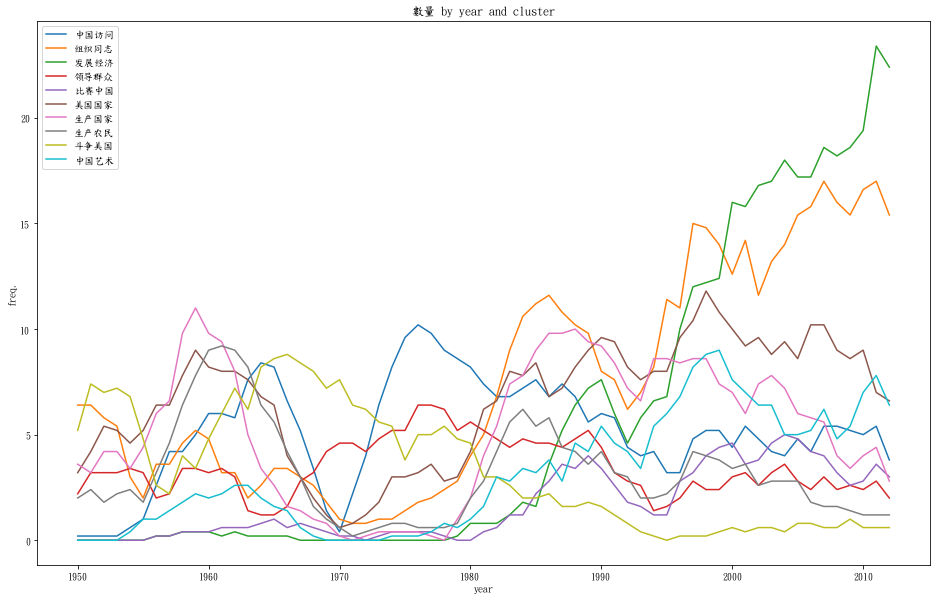

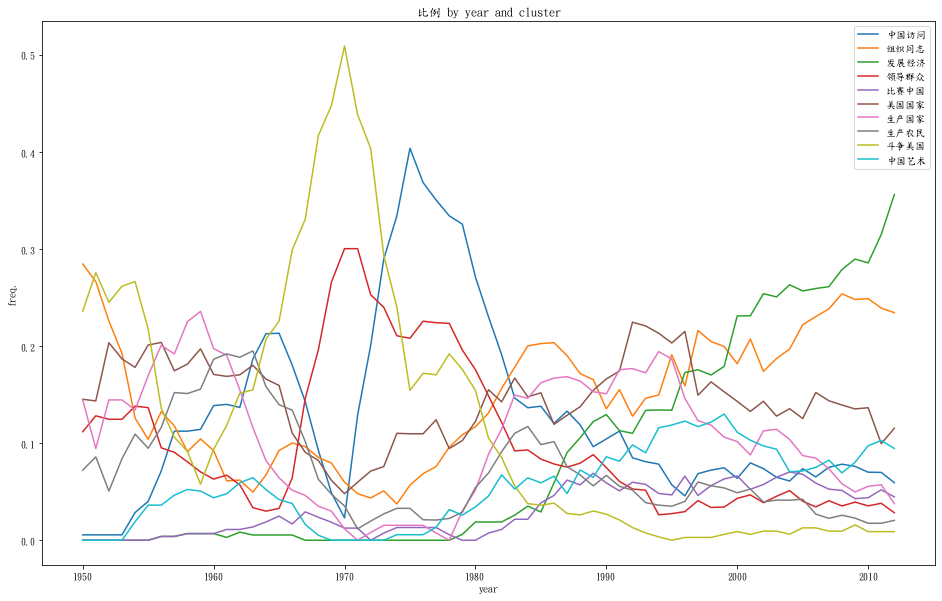

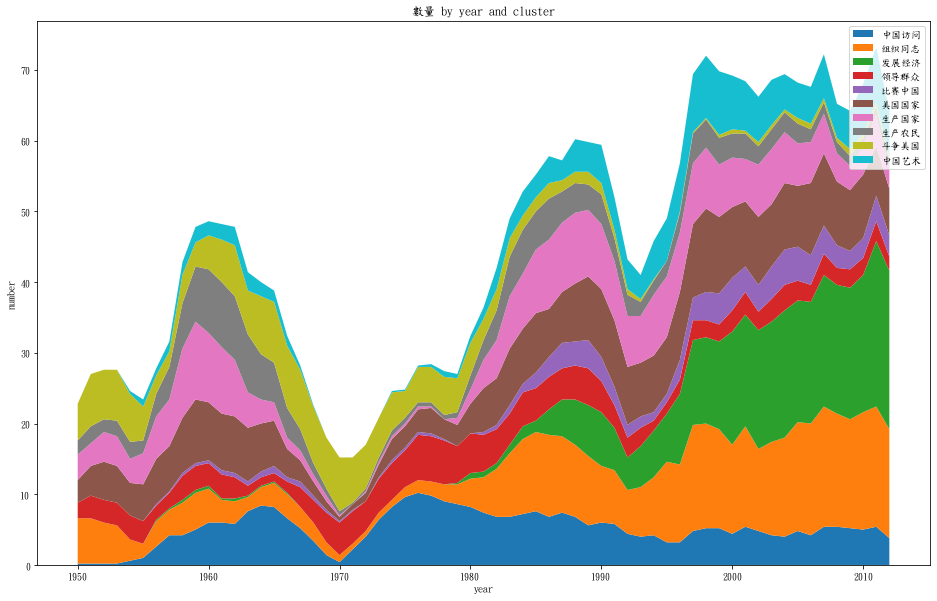

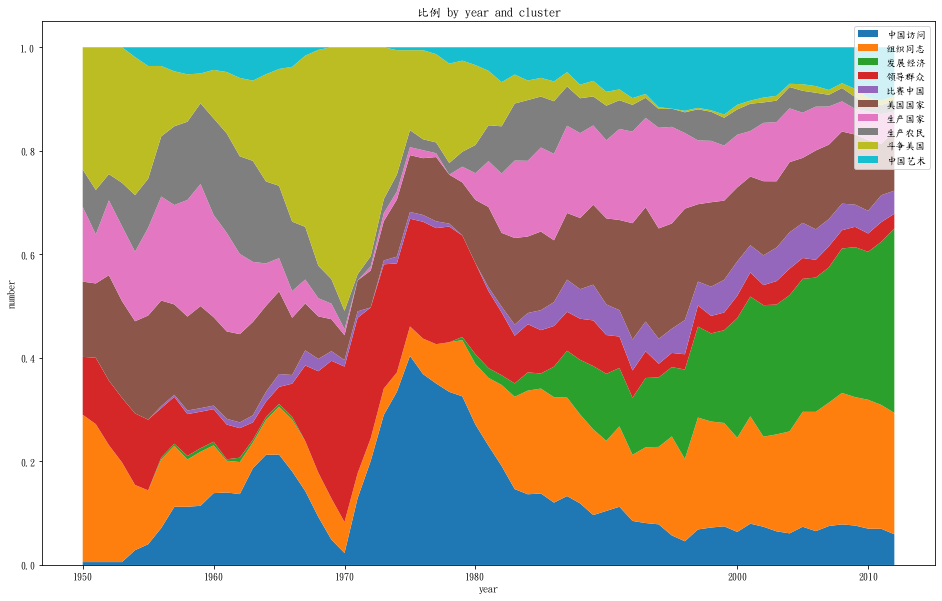

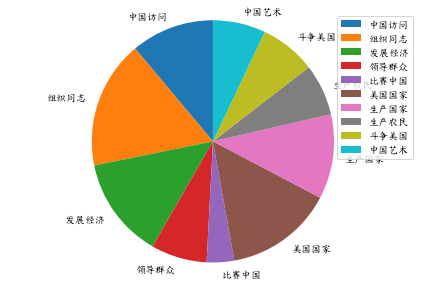

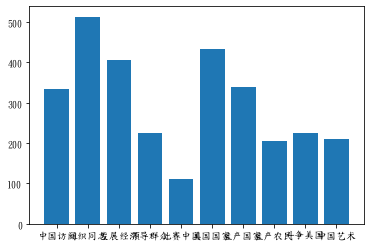

In [17]:
(df_count, df_year)= people.plot_cluster_analysis(df2, labels,path, rolling=5)

In [18]:
df_count

,0,1,2,3,4,5,6,7,8,9
1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,0.2,6.4,0.0,2.2,0.0,3.2,3.6,2.0,5.2,0.0
...,...,...,...,...,...,...,...,...,...,...
2008,5.4,16.0,18.2,2.4,3.2,9.0,4.0,1.6,0.6,4.8
2009,5.2,15.4,18.6,2.6,2.6,8.6,3.4,1.4,1.0,5.4
2010,5.0,16.6,19.4,2.4,2.8,9.0,4.0,1.2,0.6,7.0
2011,5.4,17.0,23.4,2.8,3.6,7.0,4.4,1.2,0.6,7.8


In [ ]:
df_rate

# 潛在語意分析

In [ ]:
# 降維 要花時間
title='lsa'
(df_concept, transformer, lsa, term_list)= people.lsa_concept(df, field, num_i, path,title)

In [ ]:
k=10
term='台湾'
closest= people.kClosestTerms(k,term,transformer,lsa,term_list)
closest

# 詞對分析
* 詞對分析由於需要字詞的排列順序，無法用 textrank，因此用 token 欄位替代。
* 先篩選所有有關台灣的句子。

In [28]:
# 篩選資料 要花時間
year=[1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]
path="D:/my python/people/" 
kw='台湾'
field='token'
unit='sent'
title='台湾,token,sent'
(df3, df_year)= people.doc_select(year, kw, field, unit, path, title)

1948 done 2122 201284 0.010542318316408656
1949 done 4843 505117 0.009587877660027281
1950 done 9124 621218 0.014687275642367091
1951 done 4780 559504 0.008543281191912838
1952 done 3367 417450 0.00806563660318601
1953 done 3728 521586 0.007147431104362464
1954 done 8389 505159 0.016606652558897296
1955 done 8751 593132 0.014753882778201142
1956 done 8031 783982 0.010243857639588664
1957 done 9252 968678 0.009551161479872568
1958 done 14467 980682 0.014751978725009739
1959 done 9491 991154 0.009575706701481303
1960 done 13008 977345 0.013309527341931457
1961 done 9948 797292 0.012477235441971072
1962 done 7180 611632 0.0117390849399639
1963 done 6845 616087 0.011110443817188157
1964 done 7808 668885 0.011673157568191843
1965 done 6863 667432 0.010282695465605484
1966 done 4946 549394 0.009002646552383172
1967 done 3932 420647 0.009347505152776556
1968 done 3828 402227 0.009517014024419047
1969 done 4133 415745 0.009941189912085533
1970 done 6421 462764 0.013875323058837766
1971 done 52

In [29]:
#######################################
# 直接讀取檔案，節省時間 
path="D:/my python/people/" 
kw='台湾'
field='token'
unit='sent'
title='台湾,token,sent'
df3= people.read_doc_select(unit, field, path, title) 

In [30]:
df3

,Unnamed: 0,year,filename,title,token
0,0,1948,人民日報_19480101_2_22653,俘敌将官七个缴获军用品极多消灭蒋匪十二万五千总部公布十一月份战绩,俘 蒋匪 县长 五名 ， 即 鱼台县 长 兼 保安团 长 吴 品 三 ， 高密 县长 陈楚...
1,1,1948,人民日報_19480101_2_22653,俘敌将官七个缴获军用品极多消灭蒋匪十二万五千总部公布十一月份战绩,缴 飞机 一架 ， 击落 飞机 二架 ， 击伤 战斗机 五架 缴 电台 四十二 部 报话机...
2,2,1948,人民日報_19480101_2_22654,解放新野三克广济桐柏鄂东我军,解放军 一部 ， 在 二十四日 晚 第三次 收复 广济县 城 ， 歼灭 蒋匪 青年 军 二...
3,3,1948,人民日報_19480101_2_22659,要求保证人民生活权利指斥片山内阁反动政策东京二十万工人示威,大会 在 群情激愤 中 通过 决议 ， 指斥 片山 之 社会党 政府 ， 从未 实行 其 ...
4,4,1948,人民日報_19480105_2_23676,我军完全掌握主动战局已起根本变化东北解放军发言人谈：,代替 杜匪 的 是 蒋贼 参谋总长 陈诚 ， 刚 一上台 ， 也 大肆 吹牛
...,...,...,...,...,...
711455,711455,2012,人民日報_20120101_1_20622,共同促进世界和平与发展,在 这 辞旧迎新 的 美好 时刻 ， 我 很 高兴 通过 中国国际广播电台 中央人民广播电...
711456,711456,2012,人民日報_20120101_1_20625,迈向充满希望的2012（社论）,新 的 一年 ， 只要 我们 把 思想 和 行动 统一 到 中央 的 总体 要求 和 决策...
711457,711457,2012,人民日報_20120101_4_20650,元旦零点 他们依然忙碌在岗位上,此时此刻 ， 宁静 祥和 ， 多数 人 或 已 酣然入梦 ， 而 在 钢花 四溅 的 炼厂...
711458,711458,2012,人民日報_20120101_4_20650,元旦零点 他们依然忙碌在岗位上,在 9 号 转炉 生产 平台 ， 一 炉 刚 炼 好 的 钢水 正 出炉 ， 通红 的 钢...


['台湾']
-------------------------------------------------------------------['日本']
-------------------------------------------------------------------['美国']
-------------------------------------------------------------------['苏联']
-------------------------------------------------------------------

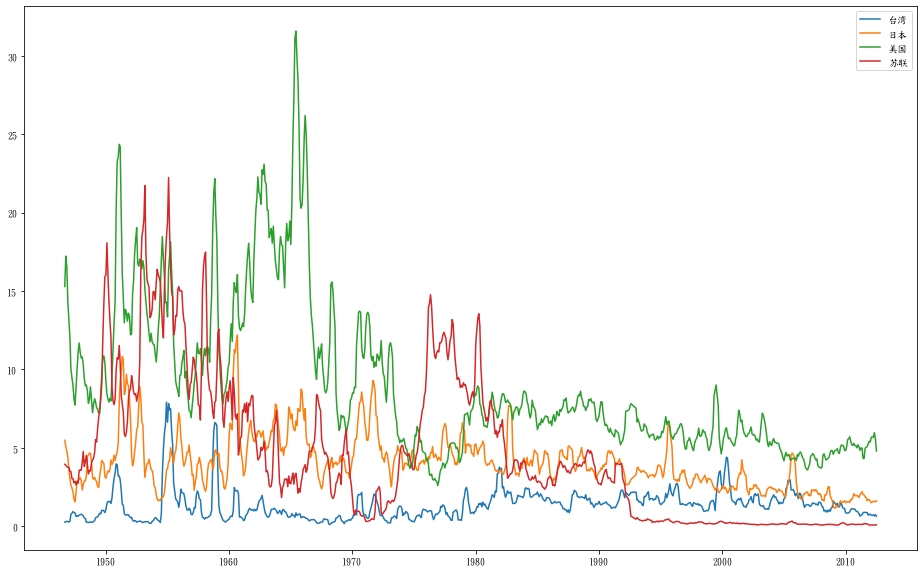

In [31]:
# 耗時甚久，小心執行 !!!!
field='token'
kw=[['台湾'],['日本'],["美国"],['苏联']]
title='台湾'
time='year'
roll=5
df_kw= people.key_word_trend_all_year(kw, path, title,rolling)

In [32]:
corpus=["革命楷模","歷史人物","黨國幹部","文藝學者","官職","會議","政策目標","政策作為","政策議題","貶抑詞","反革命","鬥爭","歌功頌德","效忠黨國",
        "褒獎詞"]
window=3
title='台湾_3'
kw=['台湾']
df_corpus= people.corpus_map_year(df3,kw, corpus,window, path,title)

1948 done 2122 found 1949 done 4843 found 1950 done 9124 found 1951 done 4780 found 1952 done 3367 found 1953 done 3728 found 1954 done 8389 found 1955 done 8751 found 1956 done 8031 found 1957 done 9252 found 1958 done 14467 found 1959 done 9491 found 1960 done 13008 found 1961 done 9948 found 1962 done 7180 found 1963 done 6845 found 1964 done 7808 found 1965 done 6863 found 1966 done 4946 found 1967 done 3932 found 1968 done 3828 found 1969 done 4133 found 1970 done 6421 found 1971 done 5244 found 1972 done 4584 found 1973 done 5082 found 1974 done 4983 found 1975 done 5033 found 1976 done 5409 found 1977 done 4852 found 1978 done 5403 found 1979 done 7331 found 1980 done 9379 found 1981 done 11683 found 1982 done 10526 found 1983 done 10071 found 1984 done 11294 found 1985 done 11277 found 1986 done 10836 found 1987 done 12980 found 1988 done 12659 found 1989 done 10820 found 1990 done 14305 found 1991 done 5579 found 1992 done 2706 found 1993 done 12693 found 1994 done 14484 found

# word2vec詞向量

In [33]:
import gensim
fname="D:/my python/people/working/w2v_model.txt" 
model = gensim.models.Word2Vec.load(fname)  # you can continue training with the loaded model!

In [34]:
# 字詞的向量
a=model.wv['台湾']  # numpy vector of a word
a

array([ 4.1991358e+00, -3.0105925e+00, -2.7386882e+00, -4.6797600e+00,
        1.8866299e+00,  5.8215437e+00,  9.3276519e-01,  5.2931738e+00,
       -2.7273712e+00,  7.4080019e+00, -6.6017640e-01,  3.4043744e+00,
       -4.3418946e+00, -5.2027826e+00, -9.6073132e-03,  6.5433922e+00,
        7.8459172e+00, -7.5976400e+00, -1.8406432e+00, -4.3923807e+00,
       -1.4355534e+00, -1.1301353e+00,  7.0246011e-01, -8.4825010e+00,
        2.8957123e-02,  3.1704404e+00, -5.1508293e+00,  1.2540920e+00,
       -2.1897664e+00,  2.1613033e+00, -1.6990650e+00, -3.3962457e+00,
       -5.8181381e+00,  8.0681801e+00, -6.8842521e+00, -7.9908860e-01,
       -5.8981407e-01,  2.8358645e+00, -5.7380786e+00, -4.7636218e+00,
        3.4119043e+00,  6.2334733e-03,  3.4191060e+00, -7.5716197e-02,
        1.7337295e+00, -7.4638276e+00, -1.5402659e+00, -2.4548755e+00,
       -5.1143436e+00,  3.2492027e+00, -1.8065994e+00,  1.6939554e+00,
       -7.1433711e-01, -5.6886810e-01,  1.9525521e+00,  1.1175520e+00,
      

## 字詞的相似性

In [35]:
model.wv.similarity('台湾','大陆')

0.7994515

## 最接近的字詞

In [36]:
model.wv.most_similar('台湾', topn=20)

[('大陆', 0.799451470375061),
 ('台湾地区', 0.794044017791748),
 ('祖国大陆', 0.7873083353042603),
 ('台湾当局', 0.775187611579895),
 ('香港', 0.7672760486602783),
 ('台湾省', 0.7604334950447083),
 ('台北', 0.7457877993583679),
 ('中国大陆', 0.7408306002616882),
 ('岛内', 0.7268843054771423),
 ('吕秀莲', 0.714836597442627),
 ('李登辉', 0.7019785046577454),
 ('蒋帮', 0.6952126026153564),
 ('台当局', 0.6893937587738037),
 ('海峡两岸', 0.6865859031677246),
 ('台湾人', 0.6864056587219238),
 ('陈水扁', 0.6789540648460388),
 ('中国台湾', 0.6759572625160217),
 ('台澎金马', 0.6686720252037048),
 ('大陆同胞', 0.6671602129936218),
 ('两国论', 0.664807915687561)]

## 與數個關鍵字最接近的字詞

In [37]:
a=model.wv.most_similar(positive=['反革命','反党', '反动'],topn=20)
a

[('反社会主义', 0.7966956496238708),
 ('反人民', 0.7730640172958374),
 ('黑帮', 0.7537546157836914),
 ('右派', 0.7401278614997864),
 ('反革命两面派', 0.7167461514472961),
 ('一伙', 0.704038679599762),
 ('反社会', 0.6998015642166138),
 ('篡权', 0.6812359690666199),
 ('右派分子', 0.6806055903434753),
 ('反党集团', 0.6796138286590576),
 ('反共', 0.6778916120529175),
 ('胡风', 0.6776517629623413),
 ('反毛泽东思想', 0.6746252179145813),
 ('叛党叛国', 0.6737684011459351),
 ('反革命修正主义分子', 0.6716745495796204),
 ('罪恶', 0.6701393723487854),
 ('李世农', 0.6661509275436401),
 ('祸国殃民', 0.6660897135734558),
 ('反毛主席', 0.6584794521331787),
 ('林江', 0.6577588319778442)]

## 與某篇文章最接近的字詞
* 文章內各字加總向量成為文章向量。
* 有更精確的做法 doc2vec
* 向量相加，因為最少次數，以及bigram設定，有些字詞會消失

In [38]:
import random
doc="我国 是 社会主义 法治 国家 法律 的 尊严 和 权威 不容 践踏 不论 涉及 到 谁 只要 触犯 法律 都 将 依法处理 决不 姑息"
doc=doc.split()
t=0
pass_count=0
# 向量相加，因為最少次數，以及bigram設定，有些字詞會消失
for w in doc:
    try:
        doc_wv=model.wv[w]
        t=model.wv[w]+t
    except: 
        # 有些字詞會消失 !!!!!
        pass_count+=1
        pass 
print (" ".join(doc))
print ('pass:', pass_count)

# 由加總的向量找最接近的字詞
model.wv.similar_by_vector(t, topn=20)

我国 是 社会主义 法治 国家 法律 的 尊严 和 权威 不容 践踏 不论 涉及 到 谁 只要 触犯 法律 都 将 依法处理 决不 姑息
pass: 0


[('法律', 0.7032383680343628),
 ('公权力', 0.6911435723304749),
 ('私权', 0.6892465949058533),
 ('执法者', 0.6498574614524841),
 ('公权', 0.6351873874664307),
 ('公共利益', 0.6348982453346252),
 ('公民权利', 0.6177797913551331),
 ('生命权', 0.6137581467628479),
 ('滑逃', 0.6122536063194275),
 ('新闻自由', 0.6118926405906677),
 ('权利', 0.61187744140625),
 ('国内法', 0.6114039421081543),
 ('绝对', 0.6107664704322815),
 ('乱罚乱杀', 0.6104909777641296),
 ('国法', 0.6082250475883484),
 ('实体法', 0.6072612404823303),
 ('强制力', 0.6049193143844604),
 ('法治', 0.6047294735908508),
 ('规制', 0.6040297746658325),
 ('必须', 0.6014659404754639)]

## 刪除model, 釋放記憶體

In [39]:
del model

# plot

[('部门', 134), ('管理', 107), ('社会', 97), ('组织', 91), ('发展', 90), ('国家', 89), ('制度', 84), ('群众', 82), ('建设', 80), ('领导', 77), ('经济', 77), ('全国', 73), ('企业', 66), ('提高', 65), ('法律', 63), ('干部', 62), ('监督', 61), ('政府', 60), ('解决', 60), ('人员', 60)]


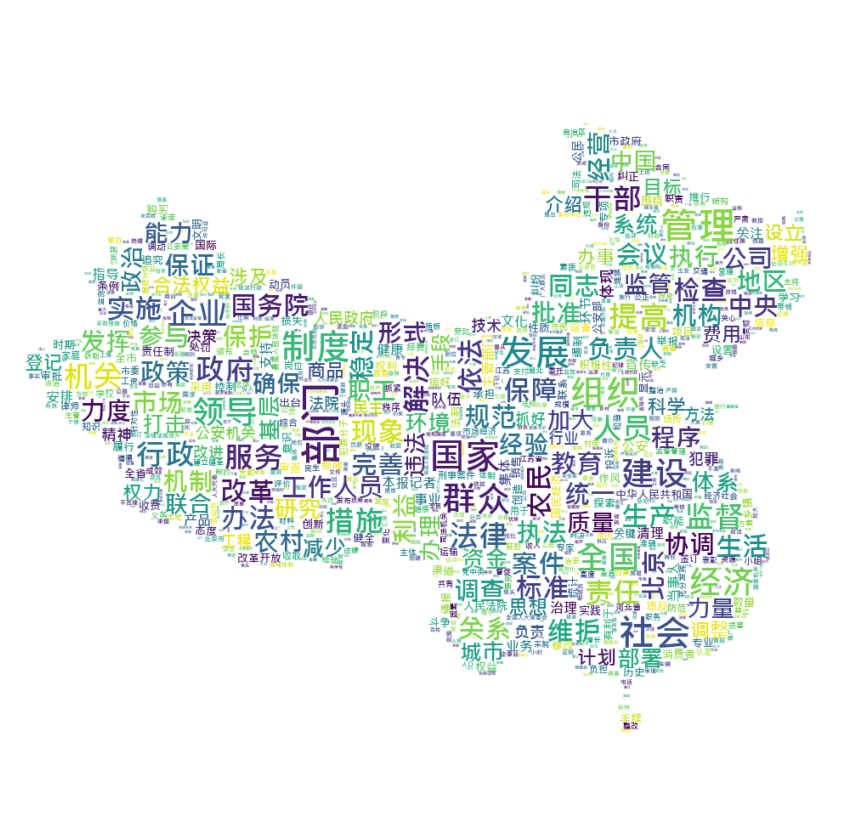

In [41]:
words=clus_token[0]
mask='china.jpg'
title='台湾'
color='white'
path="D:/my python/people/"
people.word_cloud_map(words,title, mask,path, color='white', max_font_size=50,min_font_size=3, max_words=1000, margin=2)

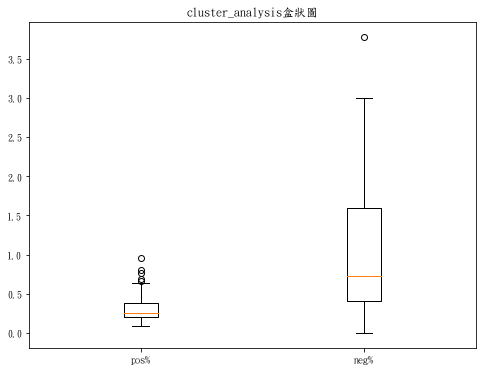

In [42]:
df_cat = people.plot_variables_compare(df_pn, variables=['pos%','neg%'])

In [43]:
df1

,Unnamed: 0,year,filename,title,textrank,褒獎詞,貶抑詞,反革命,pos,neg,anti,cate
0,0,1990,人民日報_19900607_2_871306,澳门基本法起草委员会举行第四次全体会议本报北京６月７日讯,起草 澳门基本法 委会 小组 专题 基本法 澳门 草委 会议 全体会议 内地 主任委员 北京...,[],[],[],0,0,0,6
1,1,1973,人民日報_19730415_1_434123,肥城矿务局坚决执行党的社会主义建设总路线,采煤 工作面 产量 提高 建设 作业 生产 煤炭 循环 工人 维修 革命干劲 机械 思想 矿...,['充分发挥'],[],[],1,0,0,9
2,2,1993,人民日報_19930606_6_939188,美朝关于核问题会谈休会双方将协商在１２日之前复会,会谈 朝鲜 美国 姜锡柱 条约 休会 核武器 协商 代表团 扩散 加卢齐 外长 让步 朝鲜政...,[],[],[],0,0,0,7
3,3,1956,人民日報_19560505_2_140308,加强果树管理全国著名苹果产地——辽宁省金县友好农业生产合作社的八百棵苹果树已经完成了喷射杀虫...,苹果 硫黄 喷射 乳剂 产地 著名 管理 全国 果树 辽宁省 杀虫 柴油 苹果树 预计 友好 增产,[],[],[],0,0,0,9
4,4,1988,人民日報_19881015_3_809940,抗生素抗果树腐烂病,果树 抗生素 防治 腐烂 轮纹病 病害 投入 特效 干腐病 很好 炭疽病 苹果 用于 批量生...,[],[],[],0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,1990,人民日報_19900427_2_867249,中朝签订一九九○年换货协议,中国 吕学俭 货物 朝鲜 李钟玉 会见 平壤 今天下午 议定书 核心 互换 万寿台 改革 开...,[],[],[],0,0,0,1
2996,2996,1987,人民日報_19870523_1_762707,我光电测距仪检测中心建成检测结果达到相应的国际水平,检测 测距仪 鉴定 数据 仪器 北京 精确 先进 委托 国家科委 性能 国际 具备 质量 评...,[],[],[],0,0,0,4
2997,2997,1986,人民日報_19860802_5_734323,教育改革要借鉴经济改革的经验,教育 改革 经济 发展 形式 学科 培养 经济体制 委托 并存 提高 生产 学校 教学 结构...,['专门人才'],"['分化', '浪费']",[],1,2,0,6
2998,2998,2004,人民日報_20040627_1_20594,东三省人才市场一体化启动,人才 市场 三省 东北地区 人事代理 统一 合作 信息 东北三省 标志 框架 长春 辽宁 吉...,[],[],[],0,0,0,6


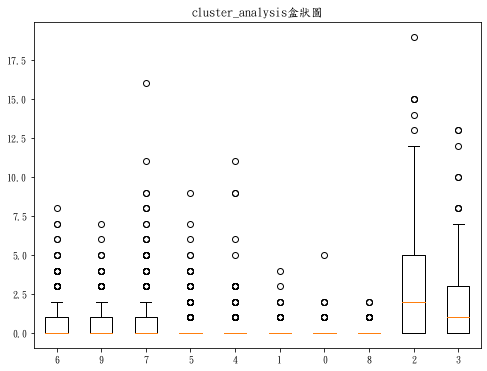

In [44]:
df_cat = people.plot_single_variable_cate(df1, variable='neg',cate='cate')

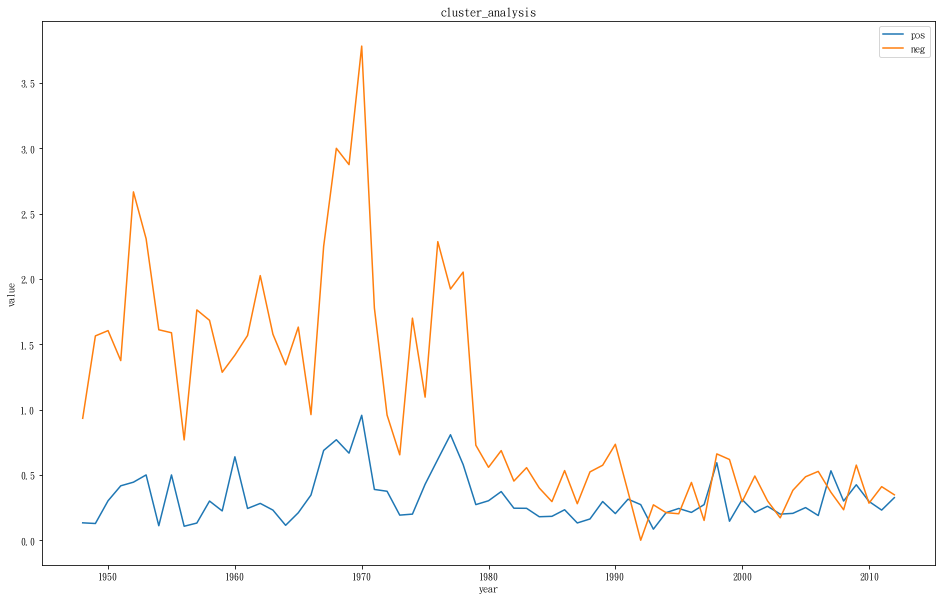

In [45]:
df_mean = people.plot_variables_year_trend(df1, variables=['pos','neg'])

# 其他

## 讀檔

In [19]:
pth='d:/my python/people/working/'
filename='para孔子.xlsx'
dfs=people.read_excel_file(filename,pth)
dfs

,Unnamed: 0,year,filename,title,para
0,0,1946,人民日報_19461003_2_5141,山东省府派员祭孔,孔府执事人愤恨国民党与民为敌，认为解放区各种设施与孔子“民为邦本”的精神甚相融洽。
1,1,1946,人民日報_19461003_2_5141,山东省府派员祭孔,【新华社滕县二十九日电】旧历八月二十七日（九月二十二日），为孔子诞辰，山东民主省政府特派司法...
2,2,1946,人民日報_19461025_2_5424,要求真正的停战令,保持一月十三日位置，从来是国共美三方公认的唯一停战准备，一月十日的停战令本身不必说，一月二十...
3,3,1946,人民日報_19461230_1_1562,论正统,辛亥革命以前，远至西周初年，汉民族称自己的祖国为中国（见尚书梓材篇），国家主权为汉民族所独有...
4,4,1947,人民日報_19470110_3_13501,毛泽东同志的儿童时代,毛泽东同志八岁时开始念书，一直到十三岁才离开那私塾。当时私塾里所教的经书，对于儿童是枯燥无味...
...,...,...,...,...,...
20955,20955,2003,人民日报_20031226_8_1287704,少年中国与天不老——中华古诗文经典诵读工程述评,本报记者 丁伟“少年智则国智，少年富则国富，少年强则国强，少年独立则国独立，少年自由则国自...
20956,20956,2003,人民日报_20031226_8_1287706,让美和高尚在心灵中统一,5.来，经过参与这一工程的几百万少年儿童的实践，促进了语文教育教材改革；经过这一工程的率先实...
20957,20957,2003,人民日报_20031226_15_1288800,伫立在毛泽东大街上,4.前，第一次来到“毛泽东大街”，这是一条东西走向的绿荫大道，双向四道，中间有绿色隔离带，两...
20958,20958,2003,人民日报_20031228_8_1291249,磨砺十年成一剑,张启成百岁老人钟敬文曾经感叹：我一年写几篇论文都感到很累，有些年轻人一年能出几本论著，实在太...


## 斷詞

In [ ]:
field='para'
title='para孔子'
dfs= people.jieba_token(dfs,field,path, title)
dfs

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache


token......


Loading model cost 0.447 seconds.
Prefix dict has been built successfully.


0 done;1000 done;2000 done;3000 done;4000 done;5000 done;6000 done;7000 done;8000 done;9000 done;10000 done;11000 done;12000 done;13000 done;14000 done;15000 done;16000 done;17000 done;18000 done;19000 done;20000 done;tfidf......
0 done;1000 done;2000 done;3000 done;4000 done;5000 done;6000 done;7000 done;8000 done;9000 done;10000 done;11000 done;12000 done;13000 done;14000 done;15000 done;16000 done;17000 done;18000 done;19000 done;20000 done;textrank......
0 done;1000 done;2000 done;3000 done;4000 done;5000 done;6000 done;7000 done;8000 done;9000 done;10000 done;11000 done;12000 done;13000 done;14000 done;15000 done;16000 done;17000 done;18000 done;

## 顯示檔案內容

In [ ]:
filename='人民日報_19461003_2_5141'
field=['title','token']
people.print_filename(filename, field,path)

## 存檔

In [ ]:
filename='人民日報_19461003_2_5141'
pth="D:/my python/people/working/" 
people.save_excel_file(df,filename, pth)